<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 55.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826312 sha256=13a37761d97bb976d835590cabbcfebbafe492530784bd10903eac480a690437
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9437405 sha256=2bd9f6163f85faeadbea54f9c79cfec21fa8e1f2f692a47fe9d59cfa70f69a05
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [279]:
import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-dkA", interval="minute60", count=600)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                     open  high   low  close        volume         value
2023-03-28 18:30:00  45.8  46.0  45.7   45.8  7.367394e+05  3.375161e+07
2023-03-28 19:00:00  45.7  45.8  45.6   45.7  1.670361e+05  7.632950e+06
2023-03-28 19:30:00  45.6  45.8  45.4   45.5  6.473017e+05  2.946559e+07
2023-03-28 20:00:00  45.5  45.6  45.3   45.5  6.628958e+05  3.012431e+07
2023-03-28 20:30:00  45.5  46.1  45.5   46.0  1.175620e+06  5.387262e+07
...                   ...   ...   ...    ...           ...           ...
2023-04-10 08:00:00  51.9  52.1  51.6   51.9  8.758248e+06  4.540757e+08
2023-04-10 08:30:00  51.9  52.0  51.6   52.0  1.503246e+07  7.795411e+08
2023-04-10 09:00:00  52.0  52.1  50.6   50.9  4.706706e+07  2.410223e+09
2023-04-10 09:30:00  50.9  51.0  50.5   50.7  1.824303e+07  9.255063e+08
2023-04-10 10:00:00  50.7  50.7  50.5   50.7  1.278001e+06  6.466515e+07

[600 rows x 6 columns]


In [280]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-03-28 18:30:00,45.8
1,2023-03-28 19:00:00,45.7
2,2023-03-28 19:30:00,45.5
3,2023-03-28 20:00:00,45.5
4,2023-03-28 20:30:00,46.0
...,...,...
595,2023-04-10 08:00:00,51.9
596,2023-04-10 08:30:00,52.0
597,2023-04-10 09:00:00,50.9
598,2023-04-10 09:30:00,50.7


In [281]:
#prophet 불러옴
from fbprophet import Prophet

In [282]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [283]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=55, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


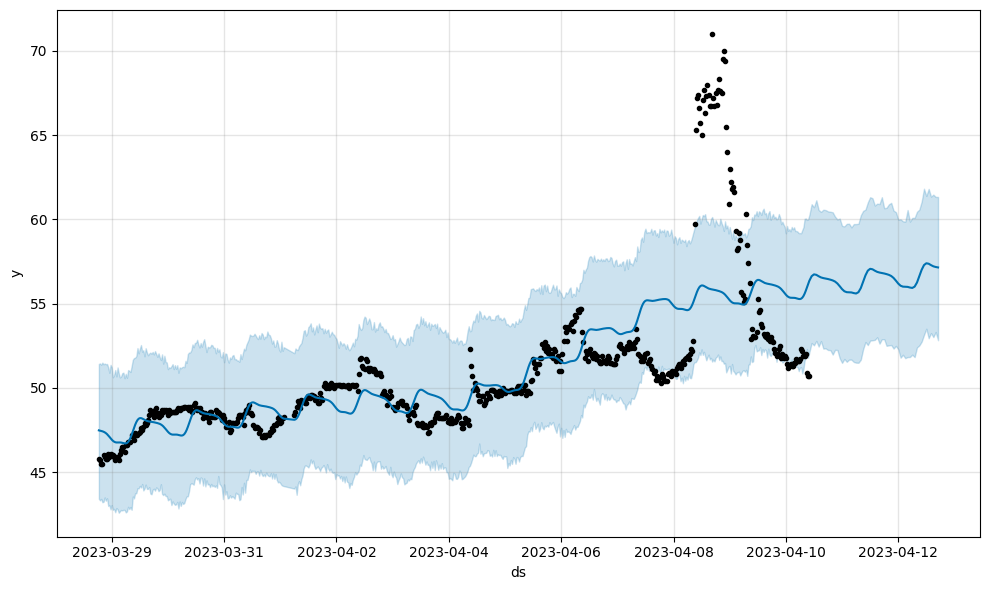

In [284]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


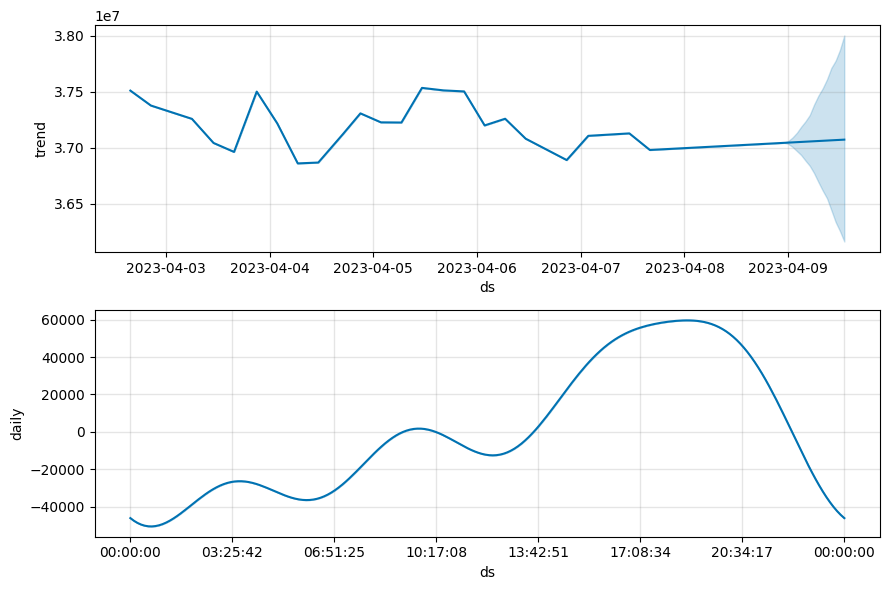

In [ ]:
 #그래프2
fig2 = model.plot_components(forecast)